# Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results.

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance.


<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Submission Details

**Project is due May 15th at 12:00 pm (Sunday Midnight). To submit the project, please save the notebook
as a pdf file and submit the assignment via Gradescope. In addition, make sure that
all figures are legible and suﬀiciently large. For best pdf results, we recommend print the notebook using [$\LaTeX$](https://www.latex-project.org/).**

## Loading Essentials and Helper Functions

In [2]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import matplotlib
import os
import time
#Sklearn classes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import metrics
from sklearn.svm import SVC  #SVM classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

from matplotlib import pyplot as plt

%matplotlib inline

#Sets random seed
import random
random.seed(42)

#Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/CM148_Project2')

import helper as helper

# import the provided helper functions
#from helper import save_fig, draw_confusion_matrix, heatmap, make_meshgrid, plot_contours

Mounted at /content/drive


# Project: Using classification methods to classify heart disease

Now that you have some examples of the classifiers that Sci-kit learn has to offers, let try to apply them to a new dataset.

## Background: The Dataset

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. You will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> Male / Female</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>chol:</b> cholesterol in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeak:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## [25 pts] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [ ]:
#TODO: Your code goes here
data = pd.read_csv('/content/drive/MyDrive/CM148_Project2/datasets/heartdisease.csv')

### [5 pts] 1.1 Looking at the data

Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [ ]:
#TODO: Your code goes here
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,False


In [ ]:
data.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(11), object(1)
memory usage: 31.2+ KB


Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Additionally, some numerical features can represent categorical features which need to be pre-processed.  **Are there any columns that need to be transformed and why?**

[Use this area to describe any fields you believe will be problematic and why] E.g., All the columns in our dataframe are numeric (either int or float), however our target variable 'sick' is a boolean and may need to be modified.

**Answer:** The 'sex' column is populated with string responses like 'Male' or 'Female' which might need to be problematic if passed into the model without being one-hot encoded first since many learning methods work strictly on numeric inputs. Since all the other fields (except the target field) are numeric, they are unlikely to pose problems unless the magnitude of any of their values is very low or very high, causing underflow/overflow errors. As mentioned in the explanation above, the target 'sick' might also need to be modified into a numeric form (e.g 1 for True, 0 for False) to be compared to the numeric output of a model.

**Determine if we're dealing with any null values. If so, report on which columns?**

In [ ]:
#TODO: Your code goes here
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

**Answer:** As shown by the output above, we are not dealing with any null values on any columns. This is also shown by `data.info()` where there are 303 entries and all columns have 303 non-null values.

### [5 pts] 1.2 Transform target label into numerical value

Before we begin our analysis, we need to fix the field(s) that will be problematic. Specifically, **convert any categorical value into binary/numerical value using the [label encoder from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), place this new array into a new column of the DataFrame named "target", and then drop the original columns from the dataframe. Afterward, use .head to print the first 5 rows**

In [ ]:
#TODO: Your code goes here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['target'] = le.fit_transform(data['sick'])
data['sex'] = le.fit_transform(data['sex'])
data = data.drop(['sick'], axis=1) #dropping the original column from the dataset
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### [5 pts] 1.3 Plotting histogram of data

Now that we have a feel for the data-types for each of the variables, plot histograms of each field.

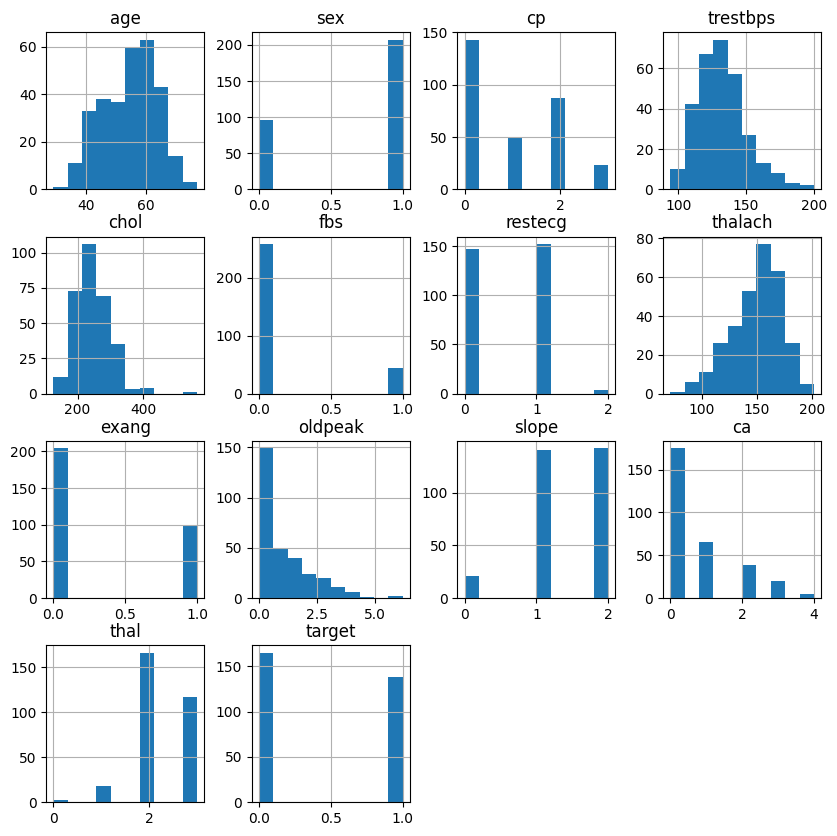

In [ ]:
#TODO: Your code goes here
data.hist(figsize=(10,10))
plt.show()

### [5 pts] 1.4 Looking at class balance

We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. *Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and discuss the results*:

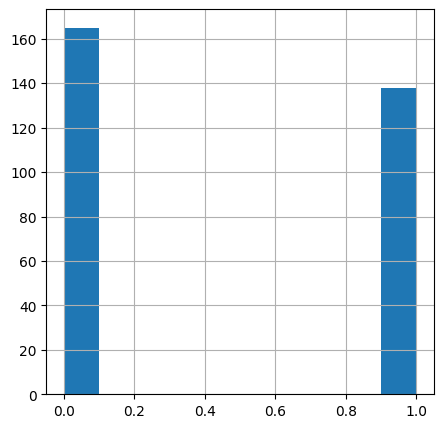

target
0    165
1    138
Name: count, dtype: int64


In [ ]:
#TODO: Your code goes here
data['target'].hist(figsize=(5,5))
plt.show()

count = data['target'].value_counts()
print(count)

**Answer:** This dataset has fewer samples of sick people (138) than of healthy people (165). This might result in a bias towards the majority class or poorer performance in predictions of the minority class (in this case the sick people). This means that the final model might be more inclined to predict that a person is healthy than sick.

Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues.

**Discuss some of the problems that might arise by artificially balancing a dataset.**

**Answer:** Reducing the number of majority class samples to balance the dataset can lead to the loss of valuable information, potentially discarding important patterns. Conversely, over-sampling (duplication) of minority class samples could cause the model to overfit to these samples, recognizing the individual sample rather than learning the underlying distribution. Artificially balancing the distribution can also alter the natural distribution and relationships between classes. For instance, if people are generally more likely to be healthy than sick, then artificially balancing the dataset might result in the model being equally likely to predict someone is sick vs if they are healthy, which would not be representative of the true nature of the distribution. As such, a bias might be introduced where minority class samples are overrepresented while others are underrepresented.

### [5 pts] 1.5 Looking at Data Correlation

Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, use the heatmap function to plot the correlations of the data.

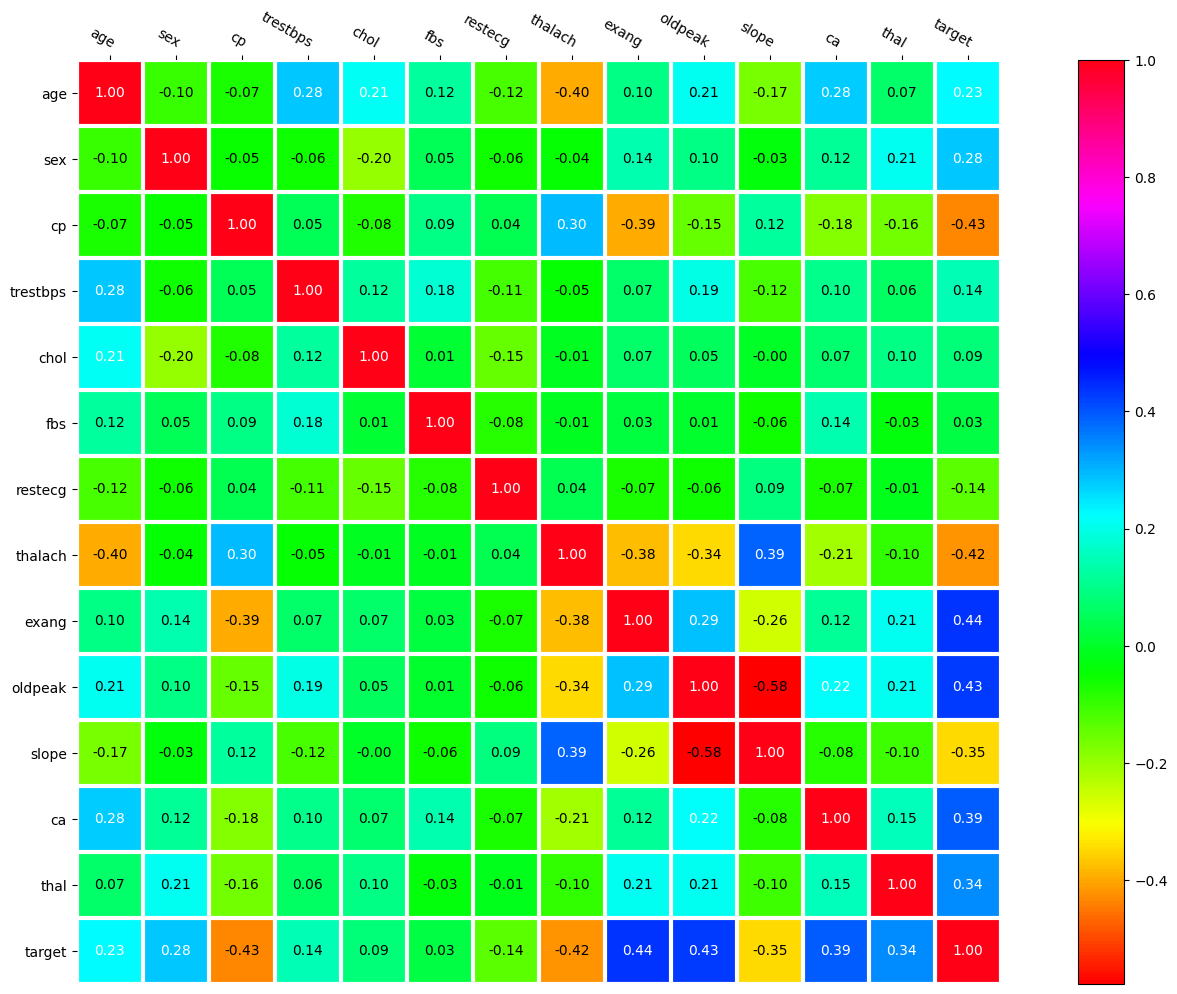

In [ ]:
#TODO: Your code goes here
correlations = data.corr()
columns = list(data)
#Creating heatmap:
helper.heatmap(correlations.values, columns, columns, figsize=(20, 12), cmap="hsv")

Next, show the correlation to the `target` feature only and sort them in descending order.

In [ ]:
#TODO: Your code goes here
correlations["target"].sort_values(ascending=False)

target      1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: target, dtype: float64

**From the heatmap values and the description of the features, why do you think some variables correlate more highly than others?**  (This question is just to get you thinking and there is no perfect answer since we have no medical background)

**Answer:** Some variables which are actually symptoms of the heart disease or are closely related to/influenced by these symptoms would have a high correlation to the existence of the heart disease, while those that have no connection to heart disease would have low correlation

## [25 pts] Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data. The first batch will simply be the raw numeric data that hasn't gone through any additional pre-processing. The second batch will be data that you will pipeline using pre-processing methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### [2 pts] 2.1 Separate target labels from data

Save the label column as a separate array and then make a new dataframe without the target.

In [ ]:
#TODO: Your code goes here
y = data['target'] #label column
x = data.drop(['target'], axis=1) #new dataframe without target

### [5 pts] 2.2 Balanced Train Test Split

Now, create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 60% of your total dataframe. To ensure that the train and test sets have balanced classes, use the [stratify command of train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Output the resulting shapes of your training and testing samples to confirm that your split was successful. Additionally, output the class counts for the training and testing cohorts to confirm that there is no artifical class imbalance.

Note: Use `randomstate = 0` to ensure that the same train/test split happens everytime for ease of grading.

In [ ]:
#TODO: Your code goes here
train_raw, test_raw, train_target, test_target = train_test_split(x,y, test_size=0.4, stratify= y, random_state=0)

### [5 pts] 2.3 KNN on raw data

Now, let's try a classification model on this data. We'll first use KNN since it is the one we are most familiar with.

One thing we noted in class was that because KNN relies on Euclidean distance, it is highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation, simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. **Report on the test accuracy of the resulting model and plot the confusion matrix.**

Recall that accurracy can be calculated easily using `metrics.accuracy_score` and that we have a helper function to draw the confusion matrix.

In [ ]:
#TODO: Your code goes here
knn = KNeighborsClassifier()
knn.fit(train_raw, train_target)
prediction = knn.predict(test_raw) #computing predictions on testing data
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_target,prediction)))

Accuracy:    0.655738


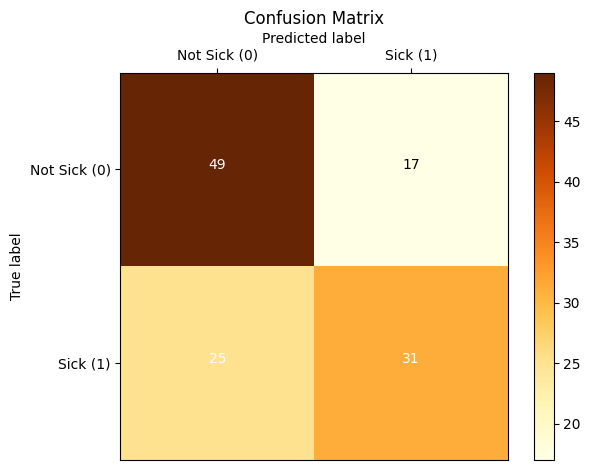

In [ ]:
helper.draw_confusion_matrix(test_target, prediction, ["Not Sick (0)", "Sick (1)"])

### [5 pts] 2.4 KNN on preprocessed data
Now lets implement a pipeline to preprocess the data. For the pipeline, use `StandardScaler` on the numerical features and one-hot encoding on the categorical features. For reference on how to make a pipeline, please look at project 1.

For reference, the categorical features are `['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal']`.

In [ ]:
#TODO: Your code goes here
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

cat_pipeline = Pipeline([("onehot", OneHotEncoder())])
num_pipeline = Pipeline([("scaler", StandardScaler())])

full_pipeline = ColumnTransformer([("cat", cat_pipeline, cat_features),
                                   ("num", num_pipeline, num_features)])

**Now use the pipeline to transform the data and then apply the same KNN classifier with this new training/testing data. Report the test accuracy. Discuss the implications of the different results you are obtaining.**

Note: Remember to use `fit_transform` on the training data and `transform` on the testing data.

In [ ]:
#TODO: Your code goes here
pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline(["cat", OneHotEncoder(), cat_features])
train_processed = full_pipeline.fit_transform(train_raw)
test_processed = full_pipeline.transform(test_raw)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_processed, train_target)
prediction = knn.predict(test_processed)
acc = metrics.accuracy_score(test_target,prediction)
print("%-12s %f" % ('Accuracy:', acc))

Accuracy:    0.754098


**Answer:**
Accuracy of the processed data is significantly higher (0.762295) compared to the accuracy of the model on the raw data (0.655738). This shows the importance of pre-processing to remove the impacts of outliers, to normalize data and reduce the skewness of results due to units of measurement/data values etc.

### [8 pts] 2.5 KNN Parameter optimization for `n_neighbors`

The KNN Algorithm includes an `n_neighbors` attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) **Let's now try n values of: 1, 2, 4, 8, 16, 32, 64. Run your model for each value and report the test accuracy for each**.

In [ ]:
#TODO: Your code goes here
n_values = [1,2,4,8,16,32,64]
accuracy = []

for i in n_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_processed, train_target)
  prediction = knn.predict(test_processed) #computing predictions on testing data
  acc = metrics.accuracy_score(test_target,prediction)
  accuracy.append(acc) #keeping track of the accuracy
  print("N=", i)
  print("%-12s %f" % ('Accuracy:', acc))

N= 1
Accuracy:    0.770492
N= 2
Accuracy:    0.745902
N= 4
Accuracy:    0.754098
N= 8
Accuracy:    0.762295
N= 16
Accuracy:    0.770492
N= 32
Accuracy:    0.778689
N= 64
Accuracy:    0.778689


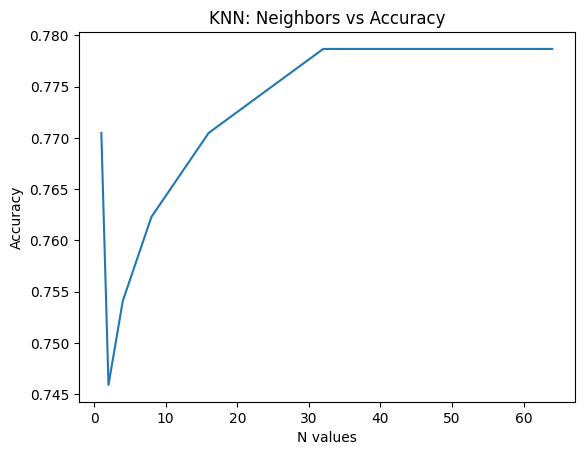

In [ ]:
plt.plot(n_values, accuracy)
plt.title("KNN: Neighbors vs Accuracy")
plt.xlabel("N values")
plt.ylabel("Accuracy")
plt.show()

**Comment for which value of n did the KNN model perform the best.  Did the model perform strictly better or strictly worse as the value of n increased?**

**Answer:** As shown by the graph, the model seems to perform strictly better as the value of n increases over this specified range. This means that for n = 32,64 the model performed the best. I suspect that this might be the expected peak region of the graph of n_values vs accuracy, and that if I continue to plot accuracy vs n values all the way up to 181 (number of samples), then the graph might resemble the inverse U curve shape that is expected. Also, the datapoints are most likely pretty far away from each other, and the points representing sick/healthy people are clustered close together in clusters that are pretty far apart. This might explain why even for larger values of k, the accuracy remains high.

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ Logistic Regression and SVM to improve upon the model and compare the results.

**For the rest of the project, you will only be using the transformed data and not the raw data. DO NOT USE THE RAW DATA ANYMORE**

## [20 pts] Part 3. Additional Learning Methods:  Logistic Regression

Let's now try Logistic Regression. Recall that Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### [5 pts] 3.1 Run the default Logistic Regression

Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model.  Use the default settings. **Report on the test accuracy and plot the confusion matrix.**

In [ ]:
#TODO: Your code goes here
log_reg = LogisticRegression()
log_reg.fit(train_processed, train_target)
testing_result = log_reg.predict(test_processed)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_target, testing_result)))

Accuracy:    0.819672


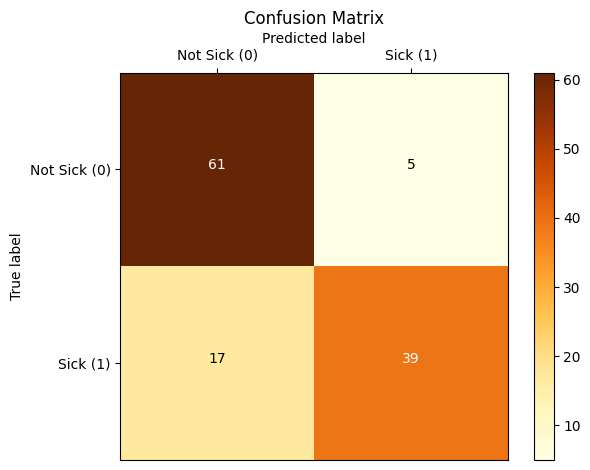

In [ ]:
helper.draw_confusion_matrix(test_target, testing_result, ["Not Sick (0)", "Sick (1)"])

### [5 pts] 3.2 Compare Logistic Regression and  KNN
In your own words, describe the key differences between Logistic Regression and KNN? When would you use one over the other?

**Answer:** Logistic regression is a parametric linear model used for binary classification. It estimates the probability that a given input belongs to a particular class. This model assumes that there is a linear relationship between the inputs and the outputs and might be unsuitable for datasets where the inputs and outputs are related in a non-linear fashion. Thus logistic regression derives a linear decision boundary.

However, KNN is a non-parametric model used for classification and regression. It classifies an input based on the majority class of its k-nearest neighbors in the feature space. Since KNN is non-parametric, it requires all datapoints to be present when a new sample point is being predicted, so it can be computationally very complex in a high dimensional feature space or with a large number of datapoints as compared to logistic regression.

Generally, logistic regression can be used for classification problems where the dataset can have a linear decision boundary, while KNN can be used in situations where the decision boundary is not necessarily linear. Logistic regression might be preferred for computational efficiency as compared to KNN.

### [5 pts] 3.3 Tweaking the Logistic Regression

**What are some parameters we can change that will affect the performance of Logistic Regression?**

**Answer:** The performance of Logistic Regression is influenced by a number of parameters including the penalty type (L1 vs L2 regularization, i.e. lasso vs ridge regularization), strength of regularization (lambda parameter), class weights (for instances of imbalanced datasets where one class is underrepresented) and different types of solvers.

**Implement Logistic Regression with the following specifications, Report the test accuracy and plot the confusion matrix**
- Use `saga` solver (Stochastic Average Gradient Accelerated Method)
- L2 penalty (ridge regularization)
- Max iteration = 1000
- `C` = 1 (inverse of regularization strength)

In [ ]:
#TODO: Your code goes here
new_log_reg = LogisticRegression(solver="saga",penalty='l2', max_iter=1000, C=1)
new_log_reg.fit(train_processed, train_target)
testing_result = new_log_reg.predict(test_processed)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_target, testing_result)))

Accuracy:    0.819672


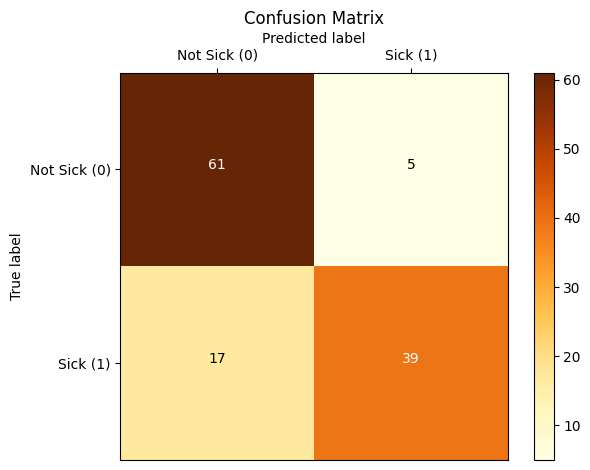

In [ ]:
helper.draw_confusion_matrix(test_target, testing_result, ["Not Sick (0)","Sick (1)"])

**Now, Implement the same regression with `c=0.001`. Report on the test accuracy and plot the confusion matrix.**

In [ ]:
#TODO: Your code goes here
new_log_reg = LogisticRegression(solver="saga",penalty='l2', max_iter=1000, C=0.001)
new_log_reg.fit(train_processed, train_target)
testing_result = new_log_reg.predict(test_processed)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_target, testing_result)))

Accuracy:    0.565574


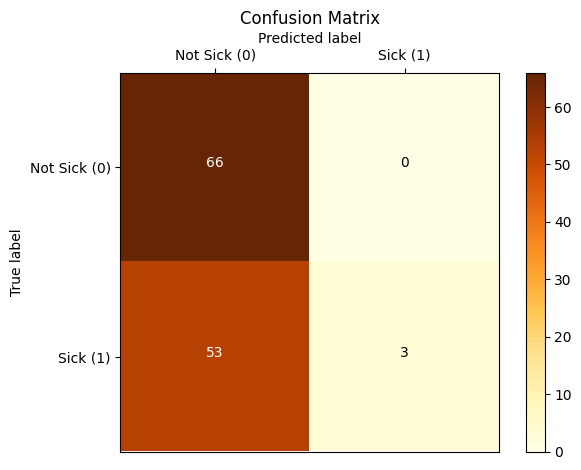

In [ ]:
helper.draw_confusion_matrix(test_target, testing_result, ["Not Sick (0)", "Sick (1)"])

**Did the accuracy drop or improve? Why?**

**Answer:** The accuracy decreases significantly from about 80% to approximately 55% when the c value decreases from 1 to 0.001. The decrease in the C value corresponds to an increase in the strength of regularization. As seen in class, when the regularizer term is prioritised more, it suppresses the actual loss function of the model by penalizing, and makes the model less overfitted (more underfitted). As the model becomes more underfitted, its accuracy decreases and this is reflected by the test accuracies computed above.

### [5 pts] 3.4 Trying out different penalties

**Now, implement Logistic Regression with the following specifications, Report the test accuracy and plot the confusion matrix**
- Use `saga` solver (Stochastic Average Gradient Accelerated Method)
- L1 penalty (LASSO regularization)
- Max iteration = 1000
- `C` = 1 (inverse of regularization strength)

In [ ]:
#TODO: Your code goes here
new_log_reg = LogisticRegression(solver="saga", penalty='l1', max_iter=1000, C=1)
new_log_reg.fit(train_processed, train_target)
testing_result = new_log_reg.predict(test_processed)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_target, testing_result)))

Accuracy:    0.827869


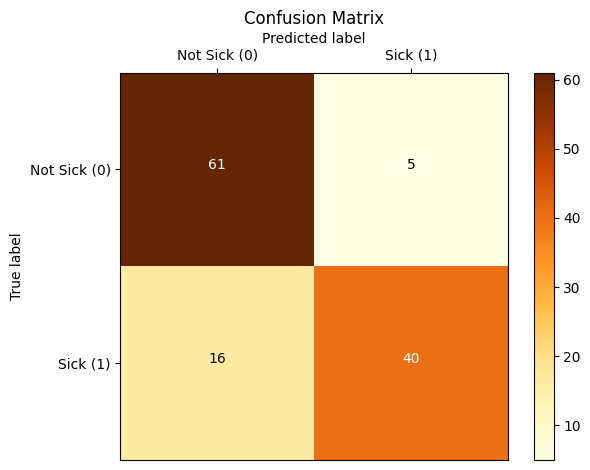

In [ ]:
helper.draw_confusion_matrix(test_target, testing_result, ["Not Sick (0)", "Sick (1)"])

**Describe what the purpose of a penalty term is and how the change from L2 to L1 affected the model.**

**Answer:** TODO

## [20 pts] Part 4. Additional Learning Methods:  SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimensional space this hyperplane is a line dividing a plane in two parts each corresponding to one of the two classes.

Recall that `scikit-learn` uses *soft-margin SVM* to account for datasets that are not separable.

### [5 pts] 4.1 Run default SVM classifier

Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings. **Report on the test accuracy and plot the confusion matrix.**

In [ ]:
#TODO: Your code goes here
svm = SVC()
svm.fit(train_processed, train_target)
predicted = svm.predict(test_processed)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_target,predicted)))

Accuracy:    0.803279


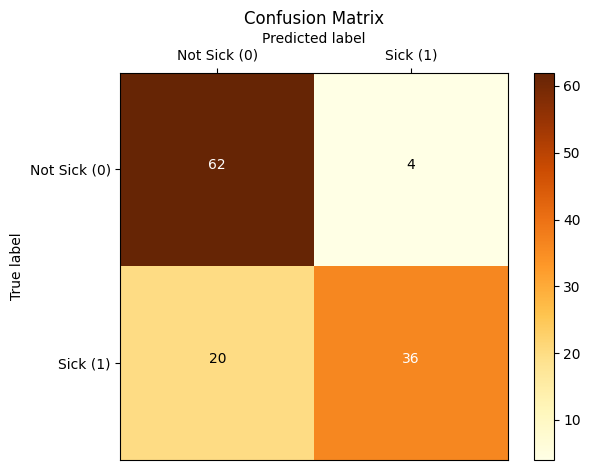

In [ ]:
helper.draw_confusion_matrix(test_target, predicted, ["Not Sick (0)", "Sick (1)"])

**Print out the number of support vectors that SVC has determined. Look at the documentation for how to get this.**

In [ ]:
#TODO: Your code goes here
print(svm.n_support_)

[54 52]


You may find that there are quite a few support vectors. This is due in part to the small number of samples in the training set and the choice of kernel.

### [5 pts] 4.2 Use a Linear SVM

`SVC` defaults to use Gaussian kernel. **Now rerun your SVM, but now use linear kernel. Report on the test accuracy and plot the confusion matrix. Also, print out the number of support vectors.**

In [ ]:
#TODO: Your code goes here
svm = SVC(kernel='linear')
svm.fit(train_processed, train_target)
predicted = svm.predict(test_processed)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_target,predicted)))

Accuracy:    0.844262


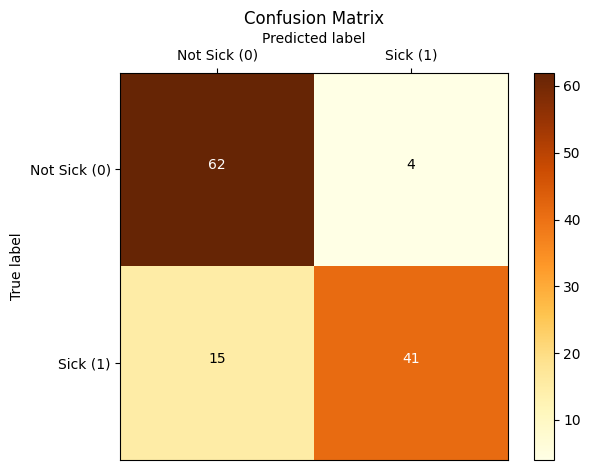

In [ ]:
helper.draw_confusion_matrix(test_target, predicted, ["Not Sick (0)", "Sick (1)"])

In [ ]:
print(svm.n_support_)

[34 31]


You will notice that number of support vectors has decreased significantly.

### [5 pts] 4.3 Compare Gaussian kernel and Linear kernel

Explain what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

**Answer:** TODO

### [5 pts] 4.4 Compare SVM and Logistic Regression

Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary but achieve it in different ways. In your own words, explain the difference between the ways that Logistic Regression and Linear SVM find the boundary?

**Answer:** Logistic regression and linear SVM are both linear classifiers, i.e they seek to find a linear decision boundary.
Logistic regression does this by modelling a probability that an input belongs to a particular class. This is done by finding a linear function that estimates the probability distribution of a particular class. However, linear SVM is non-probabilistic and aims to find the best separating hyperplane (i.e. the hyperplane that separates the data with the maximum margin).

While Logistic Regression maximizes likelihood,  linear SVM maximises the margin between classes, focusing on a clear separation. Logistic regression has a decision boundary where the probability of being in either class is 0.5.

## [10 pts] Part 5: Cross Validation and Model Selection

You've sampled a number of different classification techniques and have seen their performance on the dataset.
Before we draw any conclusions on which model is best, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation with GridSearch to determine which model perform best and assess its performance on the test set.

### [10 pts]  Model Selection

Run a `GridSearchCV` with 3-Fold Cross Validation. You will be running each classification model with different parameters.

KNN:
- `n_neighbors = [1,3,5,7]`
- `metric = ["euclidean","manhattan"] #Different Distance functions`

Logistic Regression:
- `penalty = ["l1","l2"]`
- `solver = ["liblinear","saga"]`
- `C = [0.001,0.1,10]`

SVM:
- `kernel = ["linear","rbf"]`
- `C = [0.001,0.1,10]`


Make sure to train and test your model on the transformed data and not on the raw data.

*Note: You may have to increase the number of iterations for convergence for some of the models.*

After using `GridSearchCV`, put the results into a `pandas Dataframe` and print out the whole table.

In [ ]:
#TODO: Your code goes here
param_knn = [
    {
      "n_neighbors": [1,3,5,7],
      "metric": ["euclidean","manhattan"],
    }
]

param_log_reg = [
    {
      "penalty": ["l1", "l2"],
      "solver": ["liblinear", "saga"],
      "C" : [0.001, 0.1,10],
      "max_iter": [1000]
    }
]

param_svm = [
    {
      "kernel":["linear","rbf"],
      "C":[0.001,0.1,10],
    }
]

k = 3
kf = KFold(n_splits=k, random_state=None)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_knn, cv=kf, scoring="accuracy")
grid.fit(train_processed, train_target)
res = pd.DataFrame(grid.cv_results_)

log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_log_reg, cv=kf, scoring="accuracy")
grid.fit(train_processed, train_target)
res = pd.concat([res,pd.DataFrame(grid.cv_results_)])

svm = SVC()
grid = GridSearchCV(svm, param_svm, cv=kf, scoring="accuracy")
grid.fit(train_processed, train_target)
res = pd.concat([res, pd.DataFrame(grid.cv_results_)])

res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,param_C,param_max_iter,param_penalty,param_solver,param_kernel
0,0.001176,0.000263,0.006473,0.000757,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.737705,0.783333,0.783333,0.768124,0.021509,7,NaN,NaN,NaN,NaN,NaN
1,0.000954,0.000008,0.005926,0.000066,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.803279,0.783333,0.900000,0.828871,0.050951,3,NaN,NaN,NaN,NaN,NaN
2,0.000953,0.000038,0.007439,0.002003,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.770492,0.833333,0.883333,0.829053,0.046167,1,NaN,NaN,NaN,NaN,NaN
3,0.001044,0.000099,0.011297,0.007486,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.754098,0.800000,0.883333,0.812477,0.053493,6,NaN,NaN,NaN,NaN,NaN
4,0.000960,0.000017,0.005922,0.000089,manhattan,1,"{'metric': 'manhattan', 'n_neighbors': 1}",0.737705,0.750000,0.800000,0.762568,0.026940,8,NaN,NaN,NaN,NaN,NaN
5,0.001089,0.000137,0.006576,0.000431,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.803279,0.800000,0.883333,0.828871,0.038534,3,NaN,NaN,NaN,NaN,NaN
6,0.001129,0.000040,0.007464,0.000503,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.786885,0.833333,0.866667,0.828962,0.032717,2,NaN,NaN,NaN,NaN,NaN
7,0.001081,0.000112,0.006467,0.000152,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.770492,0.833333,0.866667,0.823497,0.039874,5,NaN,NaN,NaN,NaN,NaN
0,0.001515,0.000084,0.000954,0.000064,NaN,NaN,"{'C': 0.001, 'max_iter': 1000, 'penalty': 'l1'...",0.459016,0.566667,0.616667,0.547450,0.065779,11,0.001,1000,l1,liblinear,NaN
1,0.002130,0.000759,0.001270,0.000210,NaN,NaN,"{'C': 0.001, 'max_iter': 1000, 'penalty': 'l1'...",0.459016,0.433333,0.616667,0.503005,0.081052,12,0.001,1000,l1,saga,NaN


**What was the best model and what was it's score?**

Ans: SVM with parameters: `(C=0.1, kernel=linear)`

In [ ]:
#TODO: Your code goes here
res_sorted = res.sort_values(by='mean_test_score', ascending=False)
print("Parameters:", res_sorted.iloc[0]['params'])
print("Score:", res_sorted.iloc[0]['mean_test_score'])

Parameters: {'C': 0.1, 'kernel': 'linear'}
Score: 0.8620218579234972


**Using the best model you have, report the test accuracy and plot the confusion matrix**

In [ ]:
#TODO: Your code goes here
best_model = SVC(C=0.1, kernel='linear')
best_model.fit(train_processed, train_target)
prediction = best_model.predict(test_processed)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_target,prediction)))

Accuracy:    0.811475


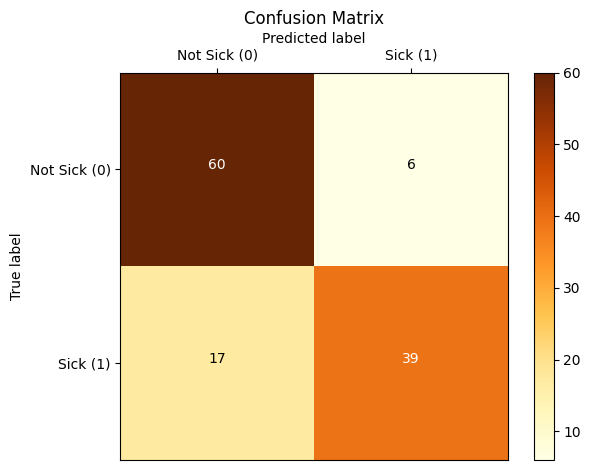

In [ ]:
helper.draw_confusion_matrix(test_target, prediction, ["Not Sick (0)", "Sick (1)"])

In [3]:
!jupyter nbconvert --to latex '/content/drive/MyDrive/CM148_Project3/Project_3a.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/CM148_Project3/Project_3a.ipynb to latex
[NbConvertApp] Support files will be in Project_3a_files/
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Making directory /content/drive/MyDrive/CM148_Project3/Project_3a_files
[NbConvertApp] Writing 76080 bytes to /content/drive/MyDrive